<a href="https://colab.research.google.com/github/Ashok21Ak/Ashokasho/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install openpyxl

In [ ]:
!pip install missingno

In [ ]:
pwd

'/content'

In [ ]:
df = pd.read_excel("/Flight_Fare.xlsx")

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [ ]:
print(df.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.dropna().sum()

,0
Airline,IndiGoAir IndiaJet AirwaysIndiGoIndiGoSpiceJet...
Date_of_Journey,24/03/20191/05/20199/06/201912/05/201901/03/20...
Source,BangloreKolkataDelhiKolkataBangloreKolkataBang...
Destination,New DelhiBangloreCochinBangloreNew DelhiBanglo...
Route,BLR → DELCCU → IXR → BBI → BLRDEL → LKO → BOM ...
Dep_Time,22:2005:5009:2518:0516:5009:0018:5508:0008:551...
Arrival_Time,01:10 22 Mar13:1504:25 10 Jun23:3021:3511:2510...
Duration,2h 50m7h 25m19h5h 25m4h 45m2h 25m15h 30m21h 5m...
Total_Stops,non-stop2 stops2 stops1 stop1 stopnon-stop1 st...
Additional_Info,No infoNo infoNo infoNo infoNo infoNo infoIn-f...


In [ ]:
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
print(df.isnull().any())

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool


In [ ]:
print(df.duplicated().sum())

220


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

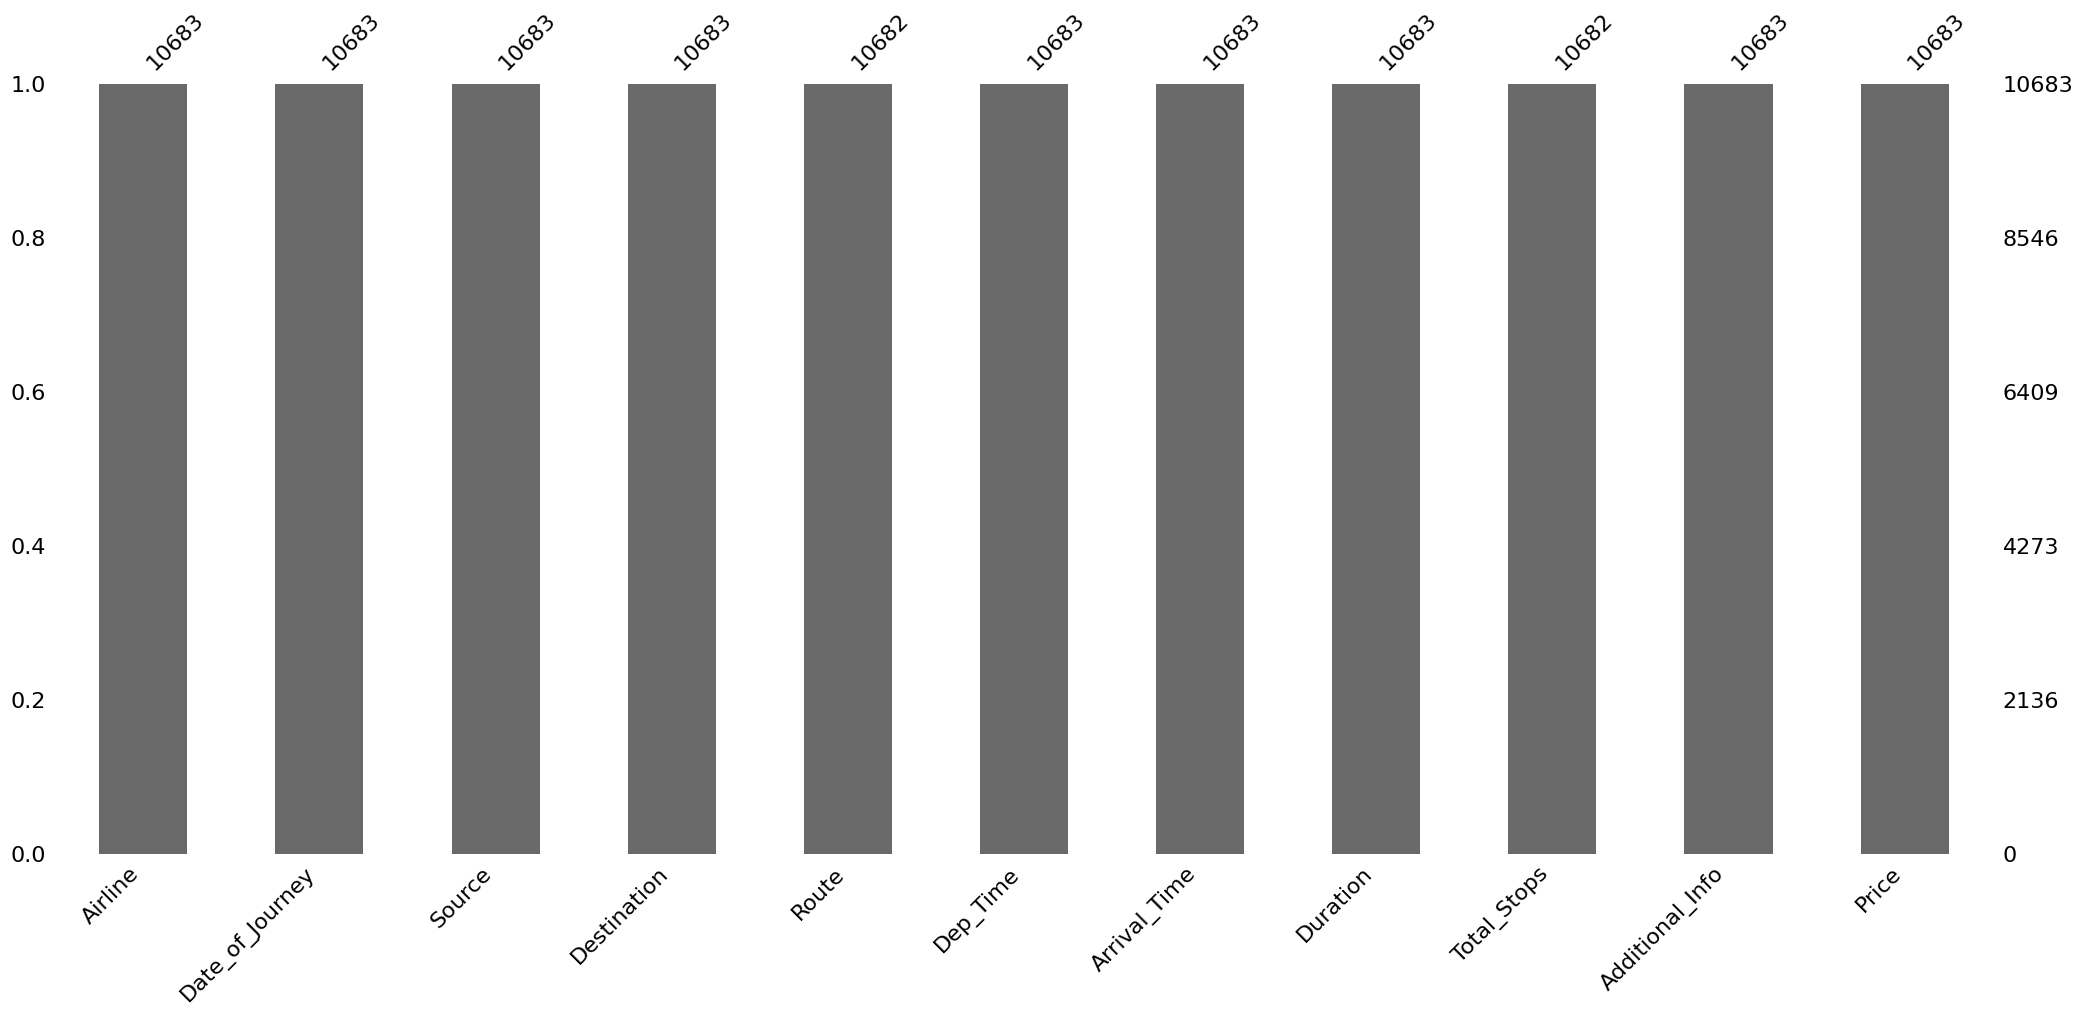

In [ ]:
import missingno as msno
msno.bar(df)
plt.show

In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
print("Missing values before:", df.isnull().sum().sum())
df.dropna(inplace=True)
print("Missing values after:", df.isnull().sum().sum())


Missing values before: 2
Missing values after: 0


In [ ]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 220
Duplicates after: 0


In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']= pd.to_datetime(df['Arrival_Time'])

In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df.columns = df.columns.str.strip()  # Remove spaces

print(df.columns)  # After stripping spaces

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-30 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-30 05:50:00,2025-03-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-30 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-30 18:05:00,2025-03-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-30 16:50:00,2025-03-30 21:35:00,4h 45m,1 stop,No info,13302


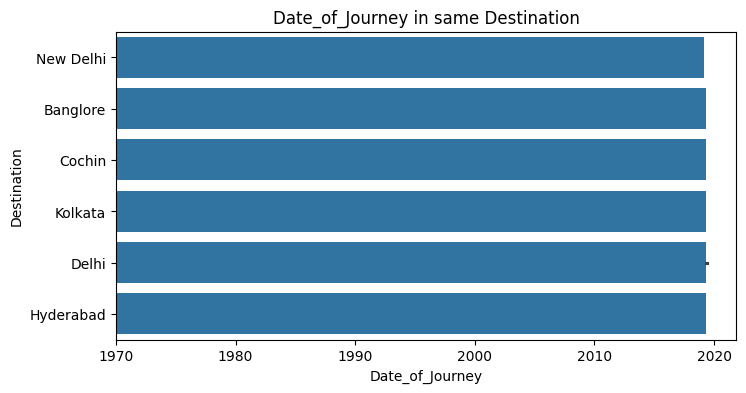

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Date_of_Journey',y='Destination',data=df)
plt.title("Date_of_Journey in same Destination")
plt.xlabel("Date_of_Journey")
plt.ylabel("Destination")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

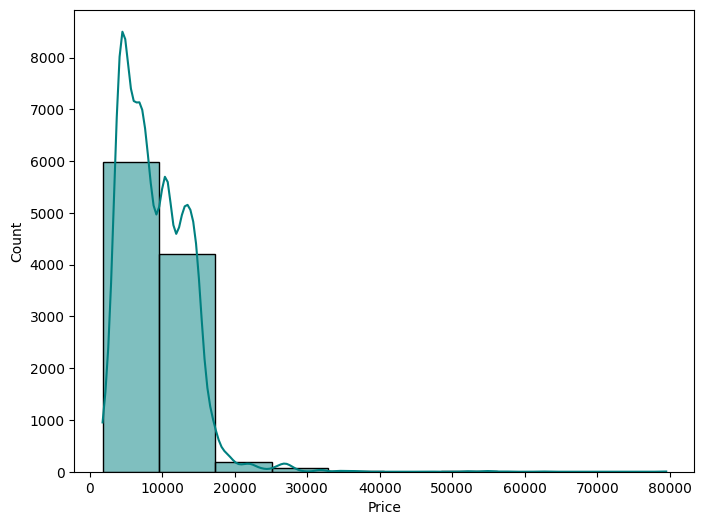

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Price'],bins=10,color='teal',kde=True)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-30 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-30 05:50:00,2025-03-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-30 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-30 18:05:00,2025-03-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-30 16:50:00,2025-03-30 21:35:00,4h 45m,1 stop,No info,13302


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
print(df.columns)  # Check if One-Hot Encoding worked
print(df[['Total_Stops']].head())  # Check ordinal encoding

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
  Total_Stops
0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop


In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-30 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-30 05:50:00,2025-03-30 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-30 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-30 18:05:00,2025-03-30 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-30 16:50:00,2025-03-30 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2025-03-30 09:00:00,2025-03-30 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-03-30 18:55:00,2025-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2025-03-30 08:00:00,2025-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-03-30 08:55:00,2025-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2025-03-30 11:25:00,2025-03-30 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [ ]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
# functiom for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'min']=data[col].dt.minute

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
#call the function
# Deporture time is when plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [ ]:
#extracting hours
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')

#drop the column
drop_col(df,'Arrival_Time')

In [ ]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timemin,Arrival_Time_hour,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


**Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration**

In [ ]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [ ]:
df['Duration']=duration

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timemin,Arrival_Time_hour,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [ ]:
df['dur_hour']=df['Duration'].apply(hour)

In [ ]:
df['dur_min']=df['Duration'].apply(minutes)

In [ ]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timemin,Arrival_Time_hour,Arrival_Timemin,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [ ]:
drop_col(df,'Duration')


In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [ ]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


Finding the categorical value

In [ ]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Finding the continuous **value**

In [ ]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Timemin',
 'Arrival_Time_hour',
 'Arrival_Timemin',
 'dur_hour',
 'dur_min']

**Handling categorical data**

We are using two main Encoding Techniques to covert Categorical data into some numerical format

Nominal data -- Data that are not in any order -->one hot encoding

ordinal data -- Data are in order --> labelEncode

In [ ]:
categorical = df[column]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


**Airline vs Price Analysis**

<Axes: xlabel='Airline', ylabel='Price'>

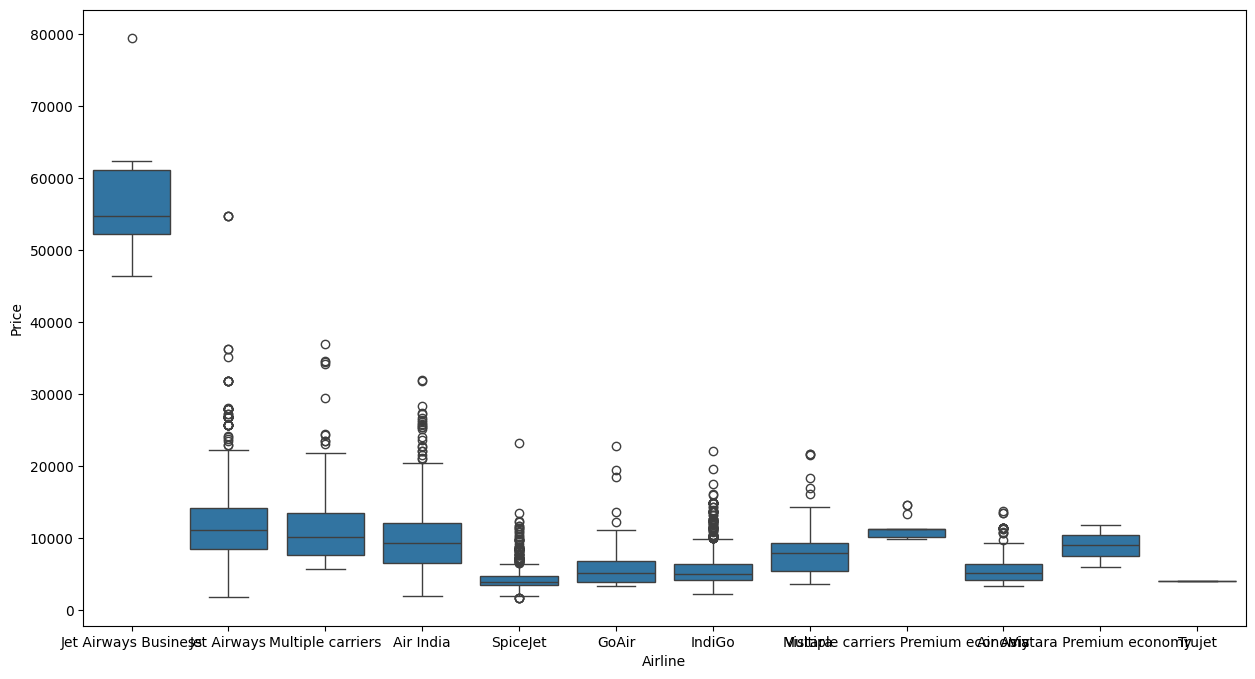

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar *median*

*Perform Total_Stops vs Price Analysis*

<Axes: xlabel='Total_Stops', ylabel='Price'>

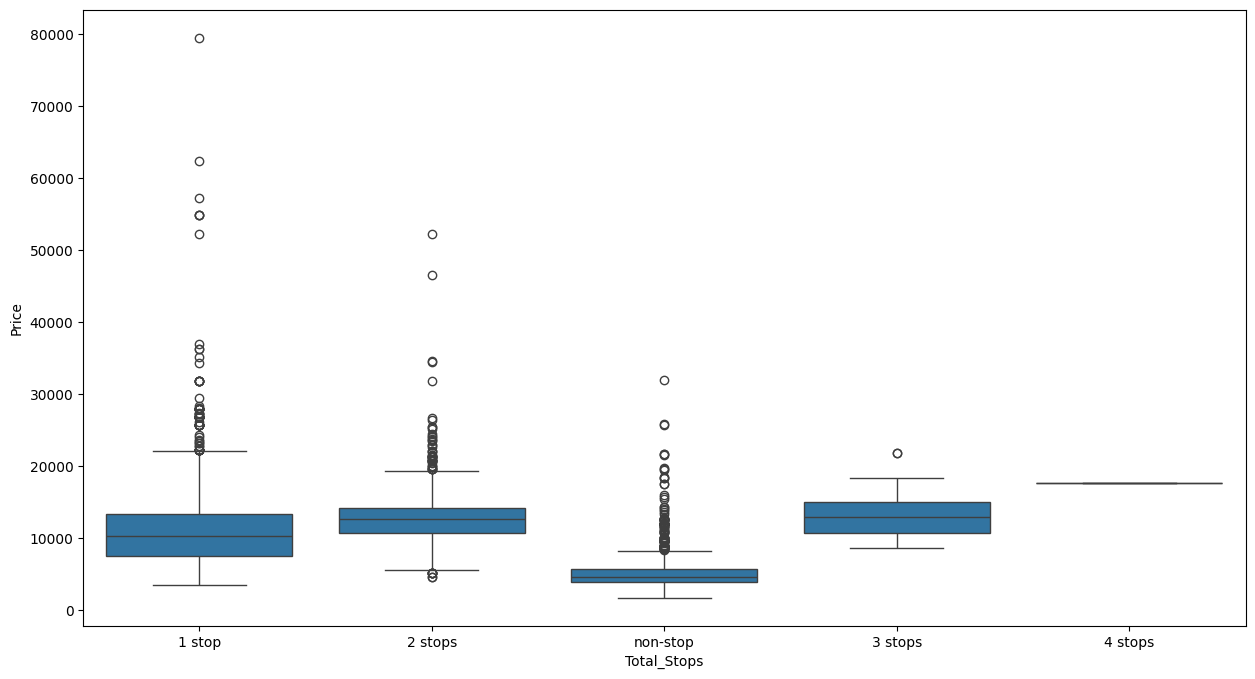

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
# As Airline is Nominal Categorical data we will perform one HotEncoading
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
categorical['Source'].value_counts()

,count
Source,
Delhi,4345
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


<Figure size 1500x1500 with 0 Axes>

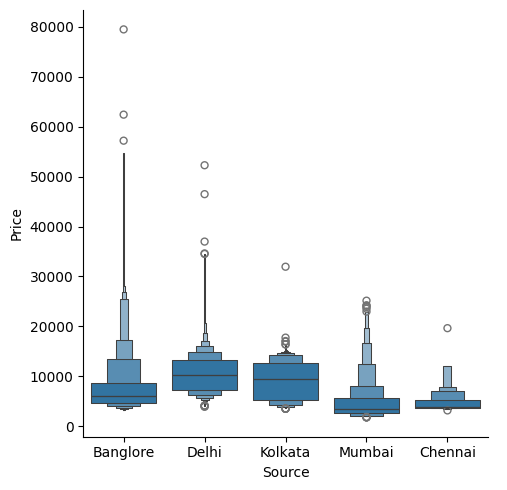

In [ ]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [ ]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
categorical['Destination'].value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


<Axes: xlabel='Destination', ylabel='Price'>

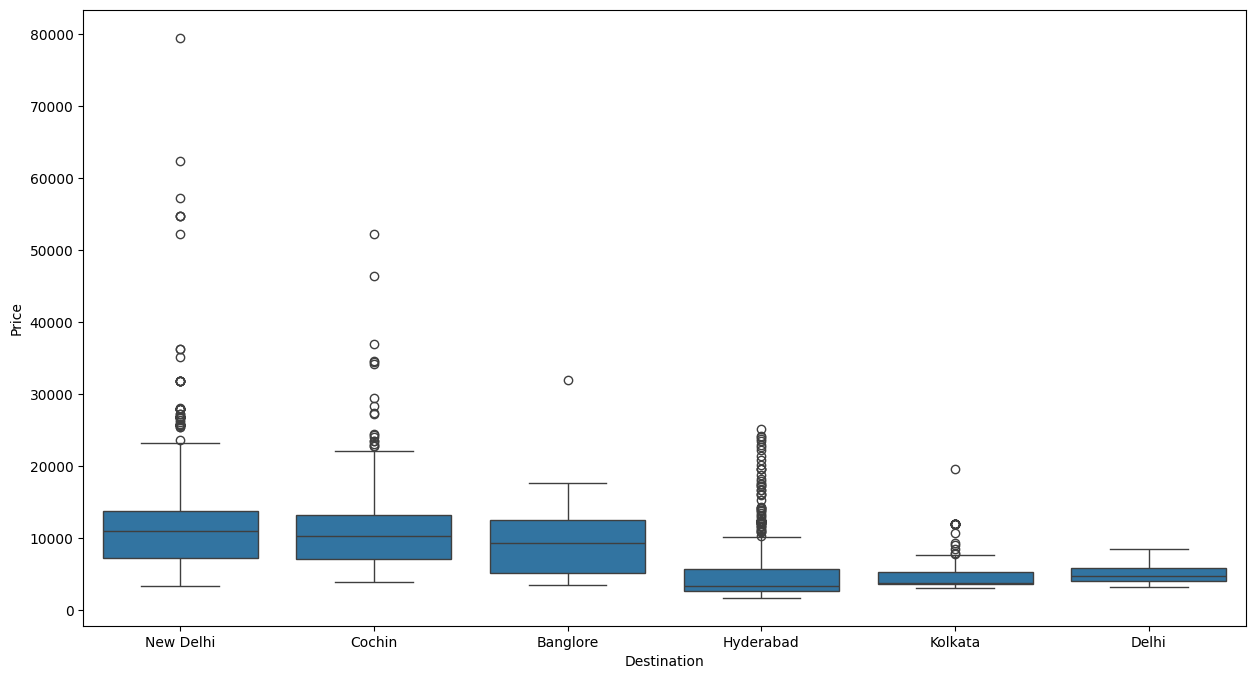

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [ ]:
# now cork on route column
categorical['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BOM → VNS → DEL → HYD,1
BLR → HBX → BOM → NAG → DEL,1
BLR → BOM → IXC → DEL,1


In [ ]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_col(categorical,'Route')

In [ ]:
categorical.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,3475
Route4,9100
Route5,10418


In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
  categorical[i].fillna('None',inplace=True)

In [ ]:
categorical.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,0
Route4,0
Route5,0


In [ ]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<Axes: xlabel='Arrival_Time_hour', ylabel='Price'>

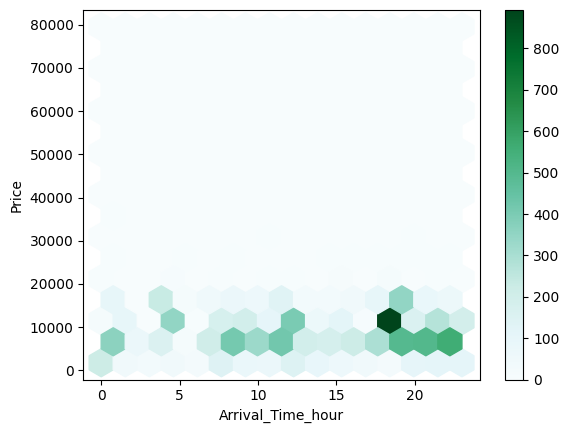

In [ ]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [ ]:
# Appliying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
  categorical[i]=encoder.fit_transform(categorical[i])


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
drop_col(categorical,'Additional_Info')

In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# encoding Total Stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [ ]:
categorical['Total_Stops']

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [ ]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

After all preprocessing,our data is ready for the **modeling**

In [ ]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [ ]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timemin,Arrival_Time_hour,Arrival_Timemin,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,16,50,21,35,4,45


In [ ]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timemin,Arrival_Time_hour,Arrival_Timemin,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,13302,1,3,16,50,21,35,4,45


**Check For Outliers**

In [ ]:
def plot(data,col):
  fig,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(data[col],ax=ax1)
  sns.boxplot(data[col],ax=ax2)

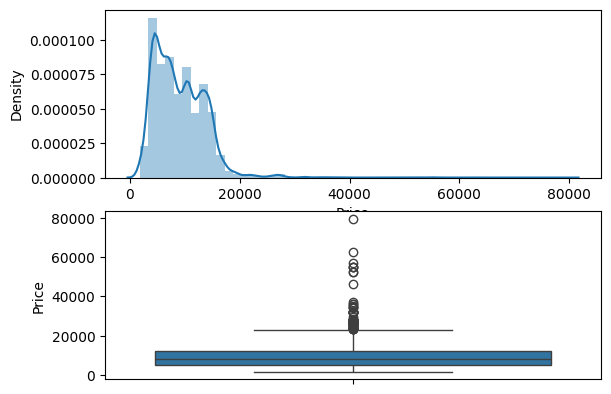

In [ ]:
plot(final_df,'Price')

*Handling outliers*

**As there is some outliers in price feature,so we replace it with median**

In [ ]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

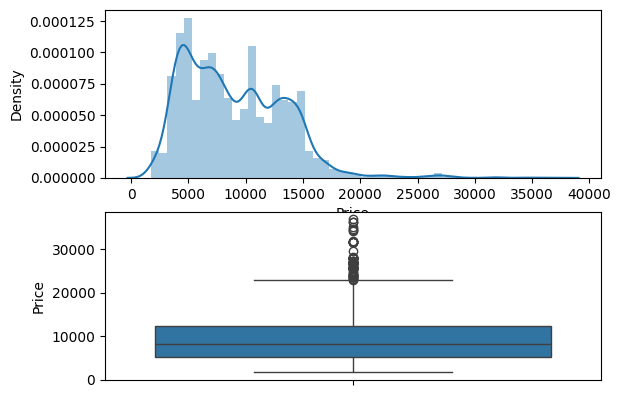

In [ ]:
plot(final_df,'Price')

**Seprate the dataset in X and Y columns**

In [ ]:
x=final_df.drop('Price',axis=1)
y=final_df['Price']

***Feature Selection***

It is about finding the best feature and having good relation with independent variable

Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(x,y)

array([1.88665312, 2.36829048, 2.99081291, 2.52734363, 1.60063909,
       1.45380709, 0.69944863, 0.09925686, 0.65070583, 0.85808093,
       0.        , 0.53126255, 0.0104832 , 0.31533506, 0.        ,
       0.21690868, 0.        , 0.18553019, 1.35619714, 0.8081565 ,
       0.2872576 , 1.34074684, 0.38803794, 0.25758764, 0.17359829,
       0.35503119, 0.86835926, 1.63175725, 1.46282929, 1.22868803,
       1.91001399, 1.61754067, 1.7402862 , 1.12718936])

In [ ]:
imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,1.879690
Route1,2.323695
Route2,2.963404
Route3,2.570226
Route4,1.645167
Route5,1.443330
Air India,0.691067
GoAir,0.102088
IndiGo,0.633522
Jet Airways,0.849434


In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.963404
Route3,2.570226
Route1,2.323695
Total_Stops,1.879690
Arrival_Time_hour,1.871070
dur_hour,1.737972
Arrival_Timemin,1.650182
Route4,1.645167
journey_month,1.604465
Dep_Time_hour,1.477945


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

**Models**

In [ ]:
# spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

    sns.distplot(y_test-predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9529406437095764
Predictions are: [11991.87        3957.616       9655.245      ... 15672.83066667
  7877.1        13255.75416667]


r2 score is: 0.817802198561344
MAE:1136.3363648882173
MSE:3418157.32804839
RMSE:1848.8259323279706


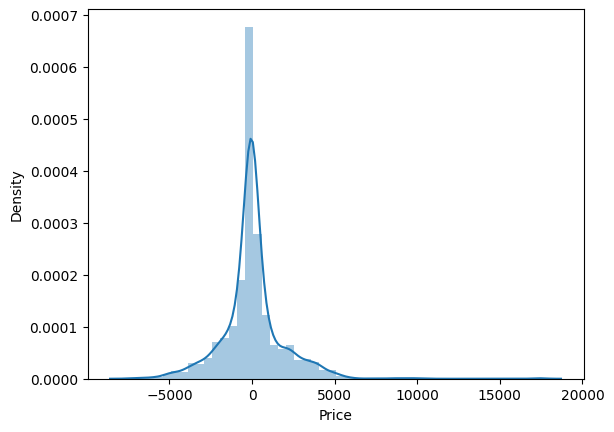

In [ ]:
predict(RandomForestRegressor())

**From the graph,it is clear that we predictd 84% correctly**

Model is: LogisticRegression()
Training score: 0.3561954833313419
Predictions are: [10844.  3873. 19225. ... 17057.  3540.  6117.]


r2 score is: 0.3873213262880737
MAE:2014.167701863354
MSE:11494277.547539417
RMSE:3390.321156990797


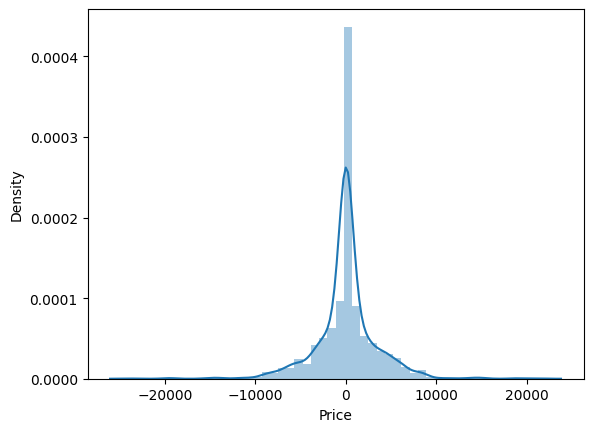

In [ ]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.778782454148427
Predictions are: [10448.   4103.4 10523.6 ... 15571.6  5367.2 13243. ]


r2 score is: 0.6689375907800896
MAE:1660.3871954132826
MSE:6210960.786469184
RMSE:2492.179926584191


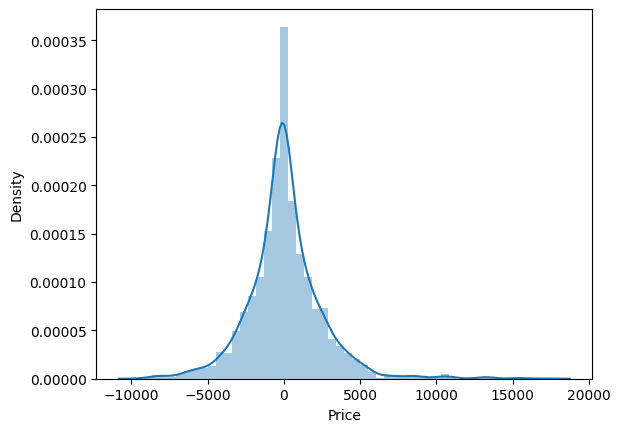

In [ ]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9670657995700809
Predictions are: [10844.  3857. 13383. ... 14973.  8580. 13033.]


r2 score is: 0.7363086565967203
MAE:1268.7243987896163
MSE:4947032.7889786055
RMSE:2224.192615080494


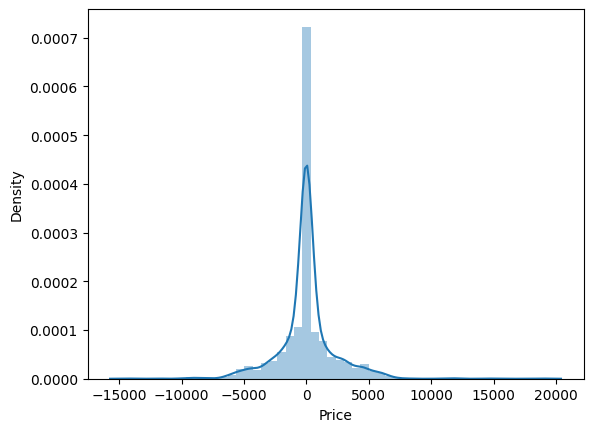

In [ ]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.04411573986452044
Predictions are: [8320.01275441 7867.94076248 8213.39882716 ... 8333.75812554 7853.43471732
 8463.32851602]


r2 score is: 0.04743025550335289
MAE:3340.358009430574
MSE:17870870.15824758
RMSE:4227.395197784042


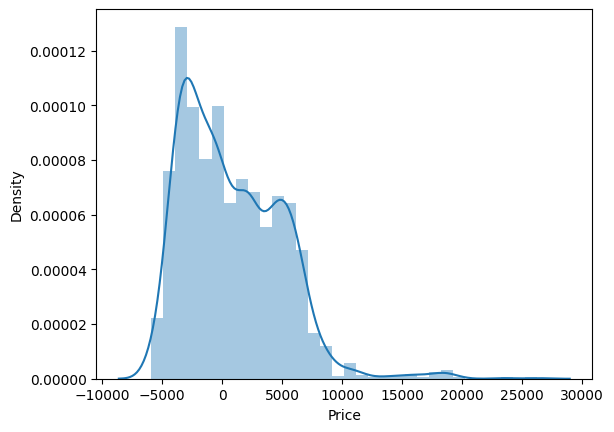

In [ ]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7942287012113869
Predictions are: [12079.17351928  4092.17597508  9036.04273969 ... 14724.79420001
 10186.65196539 12772.46938963]


r2 score is: 0.7811531479954353
MAE:1474.339582379631
MSE:4105718.9768098556
RMSE:2026.2573816793008


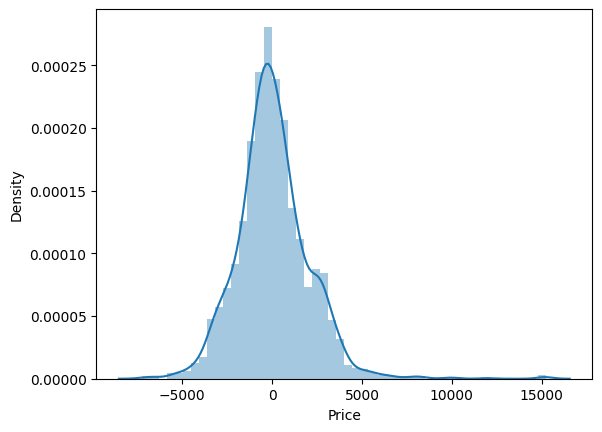

In [ ]:
predict(GradientBoostingRegressor())

*Hypertunning the model*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid ={
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [5,10,15,20],
}

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

In [ ]:
# best parameter
rf_random.best_params_

{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

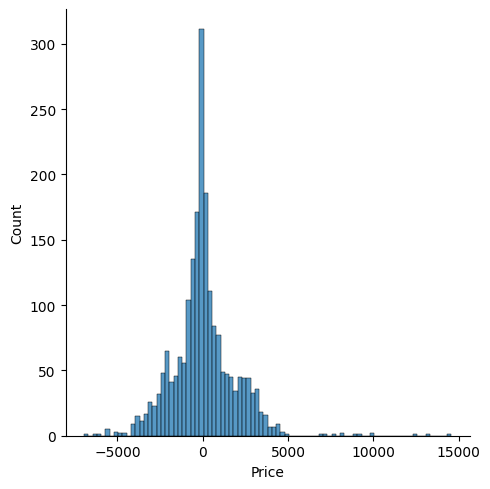

In [ ]:
#predicting the values
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
r2_score(y_test,prediction)

0.8219447313113777

**After hypertuning,the accuracy increases.**